In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_percentage_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import mlflow

In [28]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")

data_valid = data[-90:].copy()
data = data[:-90].copy()
data = data.drop(['date'], axis=1).copy()

y = data['btc_vwap_org'].copy()
X = data.drop(['btc_vwap', "btc_vwap_org"], axis=1)

valid_y = data_valid['btc_vwap_org'].copy()
valid_X = data_valid.drop(['btc_vwap', 'btc_vwap_org', 'date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

rmse = dict
mape = dict

rmse_scores = []
mae_scores = []
mape_scores = []


In [29]:
param_grids = {
    "Linear Regression": 
    {}, 

    "Decision Tree":
    {'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]},

    "Random Forest": 
    {'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['poisson', 'squared_error', 'friedman_mse', 'absolute_error']},
    
    "Gradient Boosting": 
    {'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]},

    "LightGBM": 
    {'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 1, 5]},
    
    "XGBoost" :
    {'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]},

    "AdaBoost": 
    {'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]},

    "SVR": 
    {'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]}
}

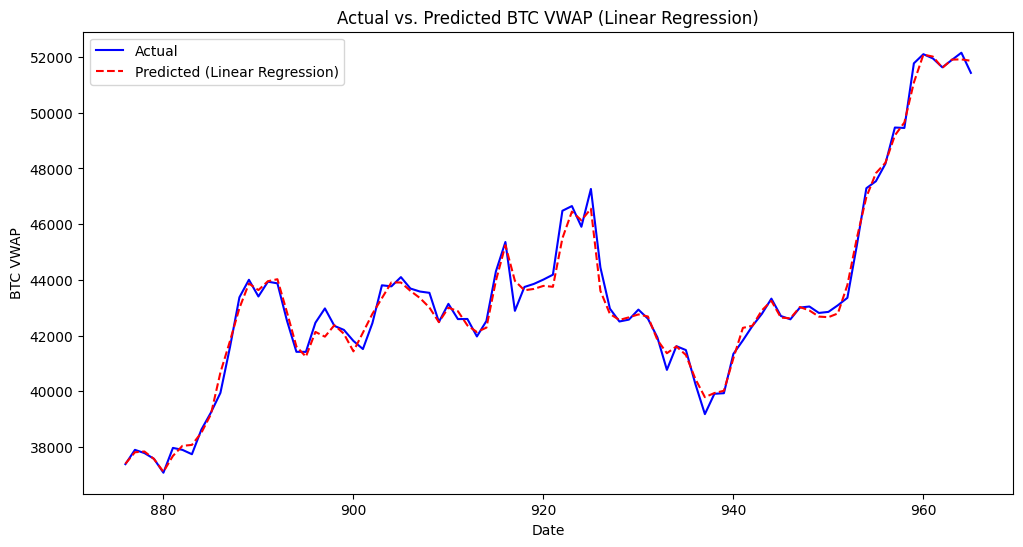

Linear Regression Grid Search Sonuçları - RMSE: 338.0700450981946, MAPE: 0.005620437055250302


2024/03/07 15:41:25 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


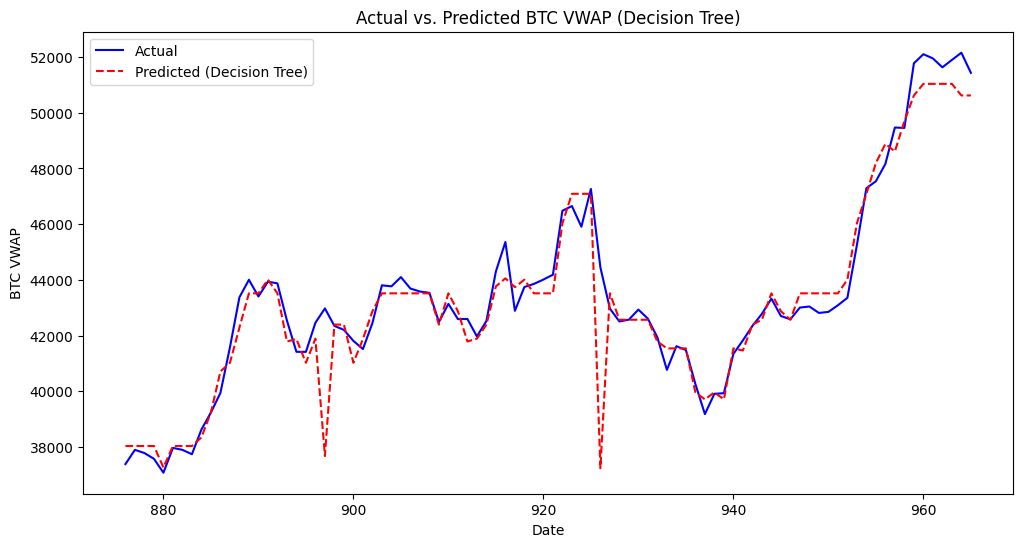

Decision Tree Grid Search Sonuçları - RMSE: 1086.1907468644158, MAPE: 0.012678727557532615


2024/03/07 15:41:27 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


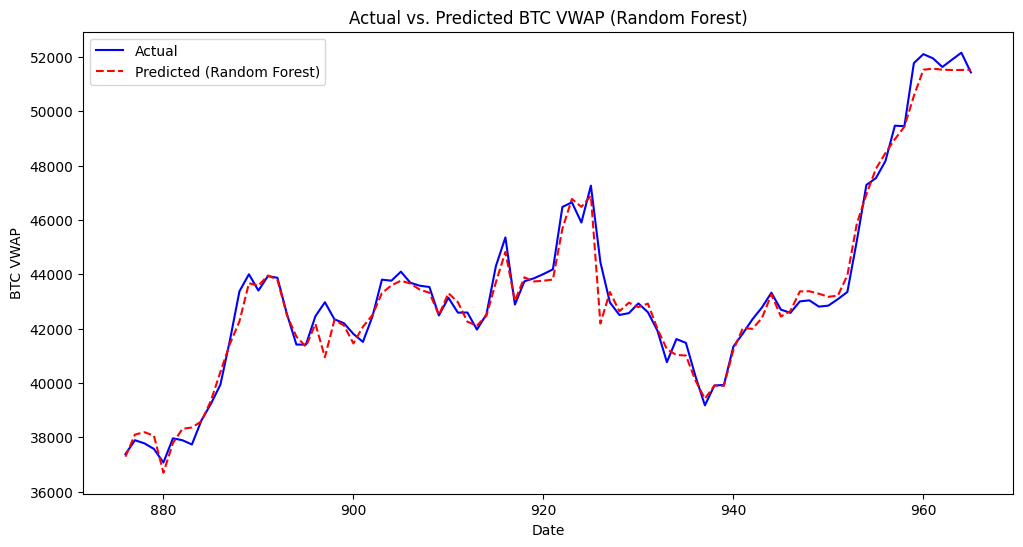

Random Forest Grid Search Sonuçları - RMSE: 489.4636539357098, MAPE: 0.007734103540712514


2024/03/07 16:11:09 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


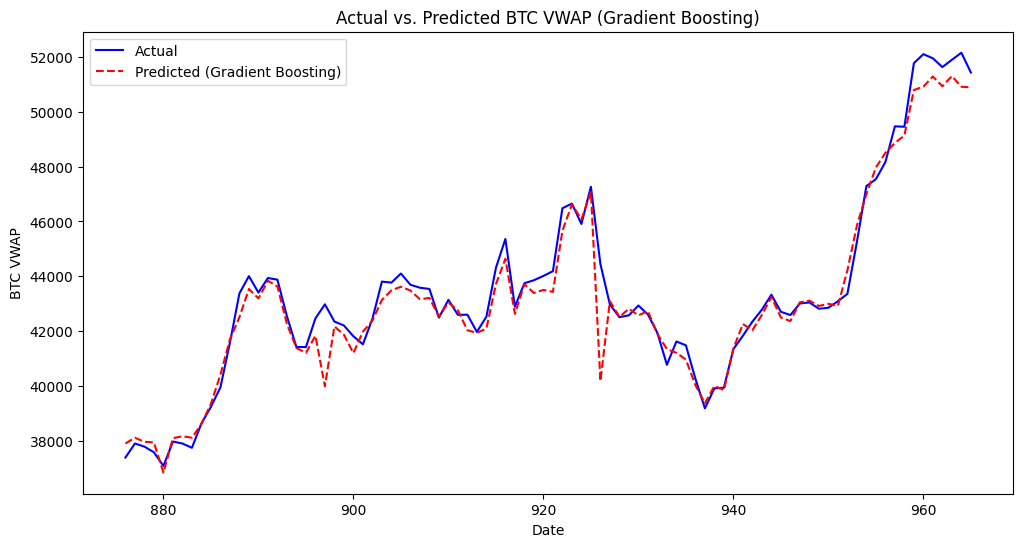

Gradient Boosting Grid Search Sonuçları - RMSE: 698.6439860193, MAPE: 0.009432648594999123


2024/03/07 16:18:45 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


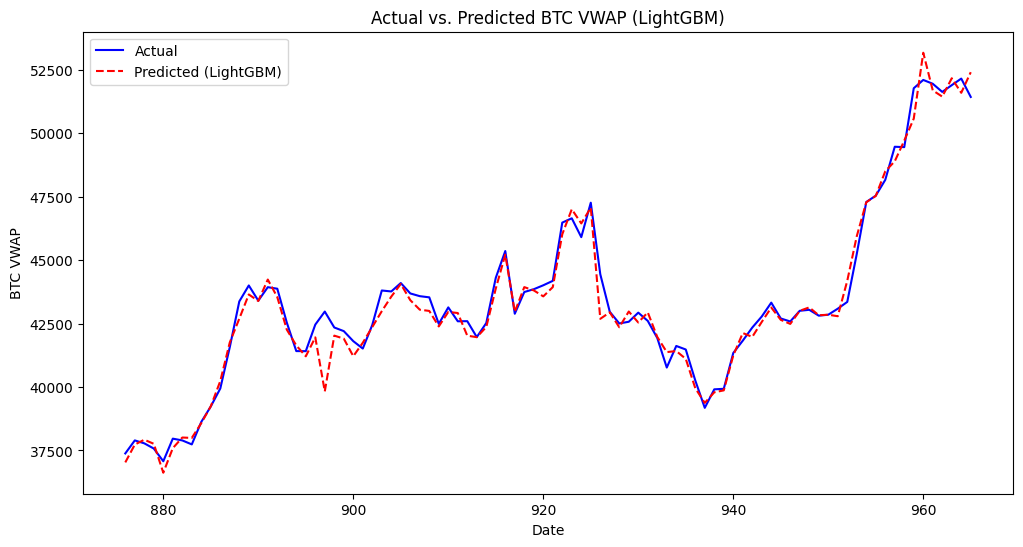

LightGBM Grid Search Sonuçları - RMSE: 536.1514053522598, MAPE: 0.007806619032224873


2024/03/07 16:19:15 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


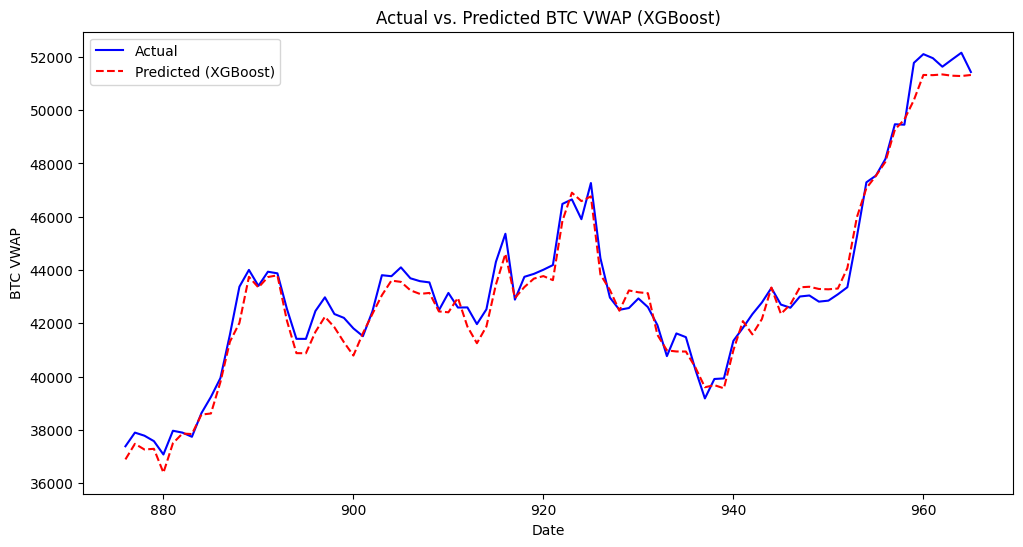

XGBoost Grid Search Sonuçları - RMSE: 521.8136692255949, MAPE: 0.010034170231681898


2024/03/07 16:20:50 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


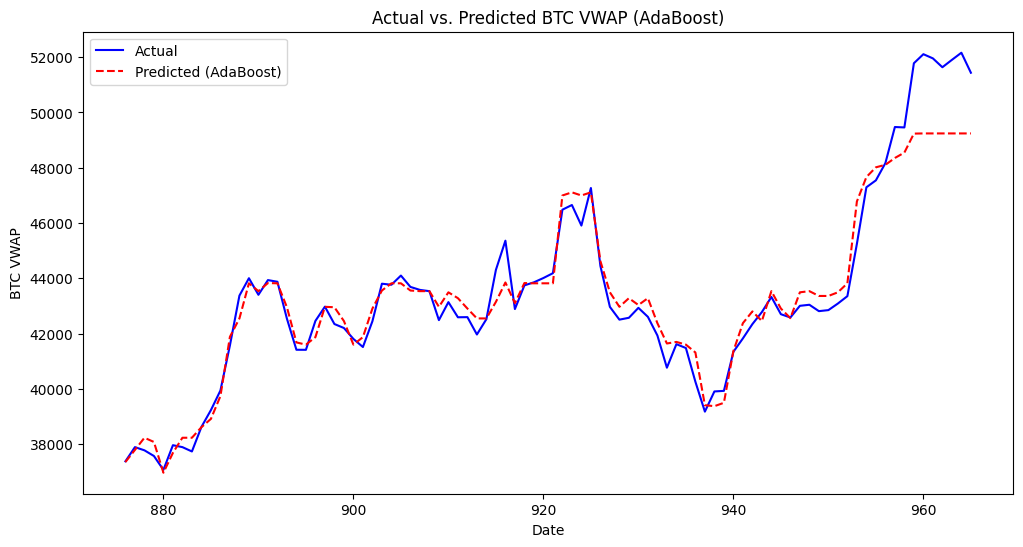

AdaBoost Grid Search Sonuçları - RMSE: 878.9772157146947, MAPE: 0.012284616007716373


2024/03/07 16:20:58 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "LightGBM": LGBMRegressor(),
    "XGBoost" : XGBRegressor(),
    "AdaBoost": AdaBoostRegressor(),
}


for model_name, model in models.items():
    param_grid = param_grids[model_name]
    
    grid_search_model = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3)
    grid_search_model.fit(X_train, y_train)

    best_model = grid_search_model.best_estimator_
    y_pred_model = best_model.predict(valid_X)

    rmse_model = np.sqrt(mean_squared_error(valid_y, y_pred_model))
    mape_model = mean_absolute_percentage_error(valid_y, y_pred_model)
    mape_scores.append((model_name, mape_model))
    rmse_scores.append((model_name, rmse_model))

    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
    plt.plot(data.index[-len(valid_y):], y_pred_model, label=f'Predicted ({model_name})', linestyle='dashed', color='red')
    plt.title(f'Actual vs. Predicted BTC VWAP ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('BTC VWAP')
    plt.legend()
    plt.show()
    print(f"{model_name} Grid Search Sonuçları - RMSE: {rmse_model}, MAPE: {mape_model}")

    # Modeli loglayın
    with mlflow.start_run(run_name=model_name.lower().replace(" ", "_")):
        mlflow.log_params(grid_search_model.best_params_)
        mlflow.log_metric("eval_rmse", rmse_model)
        mlflow.log_metric("eval_mape", mape_model)
        mlflow.sklearn.log_model(best_model, "model")
        mlflow.set_tag("Training Info", f"Bitcoin Price forecast with {model_name}")


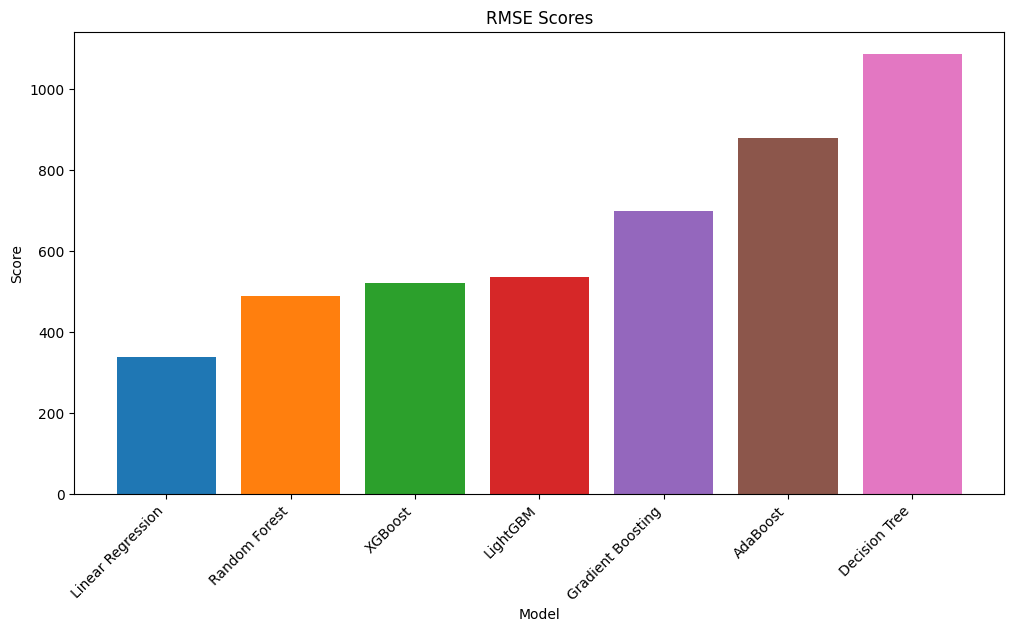

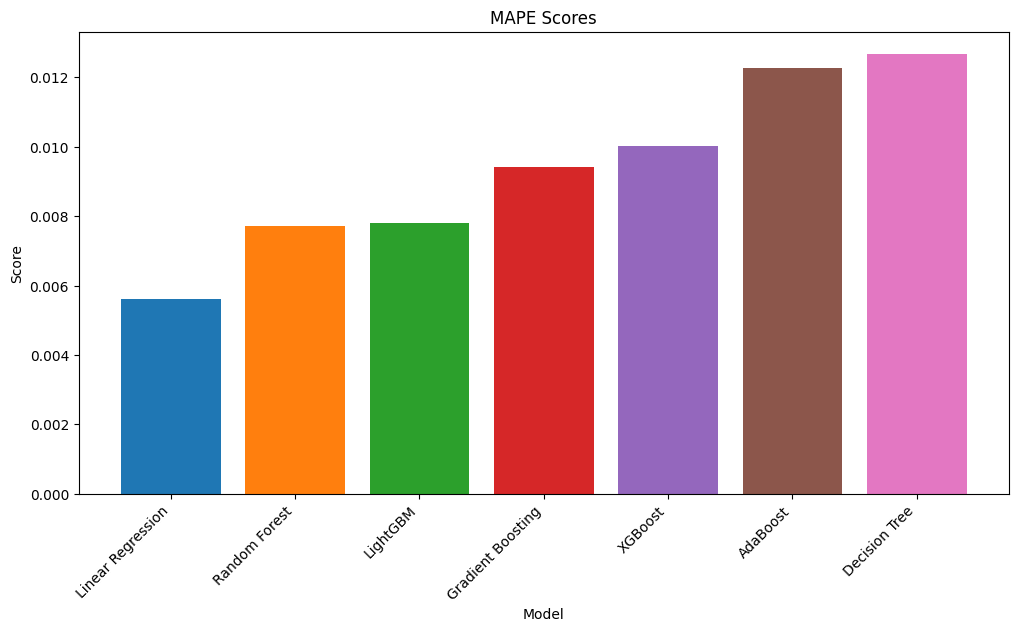

In [31]:
scores_df = pd.DataFrame({
    'Model': [item[0] for item in rmse_scores],
    'RMSE':  [item[1] for item in rmse_scores],
    'MAPE':  [item[1] for item in mape_scores]
})

scores_df_rmse = scores_df.sort_values(by='RMSE')
scores_df_mape = scores_df.sort_values(by='MAPE')
colors = plt.cm.tab10(np.arange(len(scores_df_rmse)))

plt.figure(figsize=(12, 6))
plt.bar(scores_df_rmse['Model'], scores_df_rmse['RMSE'], color=colors)
plt.title('RMSE Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(scores_df_mape['Model'], scores_df_mape['MAPE'], color=colors)
plt.title('MAPE Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()